In [3]:
from getpass import getpass
from mysql.connector import connect, Error
import pandas as pd
import numpy as np
import datetime
import re
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# получить дату предыдущей операции

try:
    with connect(
        host="localhost",
        user="root",
        password="Gtxtymr@21",
        database='daily_operations'
    ) as connection:
        query = """SELECT YEAR(operation_date), MONTH(operation_date), department, SUM(operation_revenue) Доход, SUM(operation_sum) Оборот, COUNT(operation_id) cnt FROM voo_operations
WHERE operation_date BETWEEN "2020-04-01" AND "2021-04-30"
GROUP BY 1, 2, 3
ORDER BY 1, 2, 3"""
        df = pd.read_sql(query, connection)
except Error as e:
    print(e)

In [5]:
df_group = df.groupby(['YEAR(operation_date)', 'MONTH(operation_date)']).sum()

In [8]:
from scipy.stats import pearsonr

In [11]:
pearsonr(df_group['Доход'], df_group['cnt'])

(0.3737147620833459, 0.20843784552691266)

In [26]:
handbook = pd.read_excel('Справочник_отделения.xlsx')

In [15]:
df = df.merge(handbook, how='left')

In [23]:
df_group = df.groupby(['YEAR(operation_date)', 'MONTH(operation_date)', 'Рейтинг'], as_index=False).sum()

In [30]:
pearsonr(df_group[df_group['Рейтинг'] == 'Хороший']['Доход'], df_group[df_group['Рейтинг'] == 'Хороший']['Оборот'])

(0.8655213622141853, 0.00013196847231179148)

In [32]:
dct = {'Отделение': [], 'Оборот': [], 'кол-во': []}

for department in df.department.unique():
    
    DF = df[df.department == department]
    dct['Отделение'].append(department)
    dct['Оборот'].append(pearsonr(DF['Доход'], DF['Оборот'])[0])
    dct['кол-во'].append(pearsonr(DF['Доход'], DF['cnt'])[0])

In [34]:
pd.DataFrame(dct).to_excel('Корреляции.xlsx')

In [46]:
df['Год_месяц'] = df['YEAR(operation_date)'].astype(str) + '_' + df['MONTH(operation_date)'].astype(str)

In [48]:
df_group = df.groupby(['department', 'Год_месяц'])['Доход'].sum()

In [53]:
df_group = df_group.unstack(level=1)

In [63]:
df_group = df_group.reindex(sorted(df_group.columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1]))), axis=1)

In [65]:
df_group.to_excel('Отделения_доход.xlsx')

In [71]:
df_group

Год_месяц                                              2020_4      2020_5  \
department                                                                  
Головное отделение                                   36893.88    40095.24   
Дополнительный офис № 1                            1385533.28   882002.71   
Дополнительный офис № 2 "Московский" по г. Москве   108726.09         NaN   
Дополнительный офис № 3 "Жулебино"                 4262912.17  4643308.46   
Дополнительный офис № 4 "Пресня"                   3168025.98  2835953.65   
Дополнительный офис № 5 "Бибирево"                 2976989.36  3047188.18   
Дополнительный офис № 6 "Звездная"                 1459698.95  1205723.52   
ОКВКУ № 1 "Комендантский"                          1904260.43  1688949.54   
ОКВКУ № 10 "Белорусская"                           1862680.83  2368158.03   
ОКВКУ № 11 "Новые Черемушки"                       5080135.30  4406053.68   
ОКВКУ № 12 "Озерки"                                2495134.23  2007975.23   
ОКВКУ № 13 "Наличная"                              1334439.04  1000096.24   
ОКВКУ № 14 "Семеновская"                           2163539.99  2581601.32   
ОКВКУ № 15 "Спортивная"                            1479208.92  1935527.04   
ОКВКУ № 16 "Братиславская"                         1699447.02  4515867.80   
ОКВКУ № 17 "Теплый стан"                           1562735.32  4203726.44   
ОКВКУ № 18 "Люблино"                                732951.31  3413792.90   
ОКВКУ № 19 "Заубер Сити"                                  NaN         NaN   
ОКВКУ № 2 "На Лиговском, 57"                       2173241.95  2406393.90   
ОКВКУ № 20 "Войковская"                                   NaN         NaN   
ОКВКУ № 21 "Кузьминки"                                    NaN         NaN   
ОКВКУ № 22 "Полежаевская"                                 NaN         NaN   
ОКВКУ № 23 "Чертаново"                                    NaN         NaN   
ОКВКУ № 24 "Тульская"                                     NaN         NaN   
ОКВКУ № 3 "Испытателей"                            1940316.89  1784284.62   
ОКВКУ № 4 "Международная"                          1628094.55  1597810.88   
ОКВКУ № 5 "Рижская"                                4116413.11  4454842.54   
ОКВКУ № 6 "Красные ворота"                         1286128.72  2029409.58   
ОКВКУ № 7 "Парк Победы"                            1909629.12  1515278.20   
ОКВКУ № 8 "Павелецкая"                             3406959.52  4128730.22   
ОКВКУ № 9 "Крылатское"                             3891547.22  3562217.90   

Год_месяц                                               2020_6      2020_7  \
department                                                                   
Головное отделение                                  1394622.11  1423061.18   
Дополнительный офис № 1                             1275263.74  1115224.06   
Дополнительный офис № 2 "Московский" по г. Москве   4153164.49  2666922.38   
Дополнительный офис № 3 "Жулебино"                  7689776.36  6522107.11   
Дополнительный офис № 4 "Пресня"                    5113262.83  3764196.04   
Дополнительный офис № 5 "Бибирево"                  4262087.66  3537014.32   
Дополнительный офис № 6 "Звездная"                  1632127.82  1440804.27   
ОКВКУ № 1 "Комендантский"                           1833364.74  1677252.48   
ОКВКУ № 10 "Белорусская"                            4008375.13  2955025.75   
ОКВКУ № 11 "Новые Черемушки"                        6227948.22  4486386.51   
ОКВКУ № 12 "Озерки"                                 2348053.41  2591716.06   
ОКВКУ № 13 "Наличная"                               1294425.67  1046127.50   
ОКВКУ № 14 "Семеновская"                            5993857.74  4057575.66   
ОКВКУ № 15 "Спортивная"                             4051506.15  3003462.21   
ОКВКУ № 16 "Братиславская"                         10315158.15  6861759.83   
ОКВКУ № 17 "Теплый стан"                            8565482.49  6298973.67   
ОКВКУ № 18 "Люблино"                                75

In [208]:
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

In [76]:
df

YEAR(operation_date)  MONTH(operation_date)  \
0                    2020                      4   
1                    2020                      4   
2                    2020                      4   
3                    2020                      4   
4                    2020                      4   
..                    ...                    ...   
372                  2021                      4   
373                  2021                      4   
374                  2021                      4   
375                  2021                      4   
376                  2021                      4   

                                            department       Доход  \
0                                   Головное отделение    36893.88   
1                              Дополнительный офис № 1  1385533.28   
2    Дополнительный офис № 2 "Московский" по г. Москве   108726.09   
3                   Дополнительный офис № 3 "Жулебино"  4262912.17   
4                     Дополнительный офис № 4 "Пресня"  3168025.98   
..                                                 ...         ...   
372                                ОКВКУ № 5 "Рижская"  3419104.13   
373                         ОКВКУ № 6 "Красные ворота"  1819911.59   
374                            ОКВКУ № 7 "Парк Победы"  2125724.65   
375                             ОКВКУ № 8 "Павелецкая"  2752791.73   
376                             ОКВКУ № 9 "Крылатское"  4529576.31   

           Оборот   cnt               Отделение  Рейтинг Год_месяц  
0    1.187381e+07     3                      ГО  Хороший    2020_4  
1    3.084678e+08  1559             Марата-ДО 1   Плохой    2020_4  
2    1.885107e+07    60         Московский-ДО 2  Хороший    2020_4  
3    8.268795e+08  2502           Жулебино-ДО 3  Хороший    2020_4  
4    6.290770e+08  1359             Пресня-ДО 4   Плохой    2020_4  
..            ...   ...                     ...      ...       ...  
372  9.937897e+08  3450         Рижская-ОКВКУ 5   Плохой    2021_4  
373  5.360504e+08  1988  Красные ворота-ОКВКУ 6  Хороший    2021_4  
374  6.075894e+08  4160     Парк Победы-ОКВКУ 7  Хороший    2021_4  
375  7.787910e+08  2559      Павелецкая-ОКВКУ 8  Хороший    2021_4  
376  1.323913e+09  4398      Крылатское-ОКВКУ 9  Хороший    2021_4  

[377 rows x 9 columns]

Text(0, 0.5, 'Отделения')

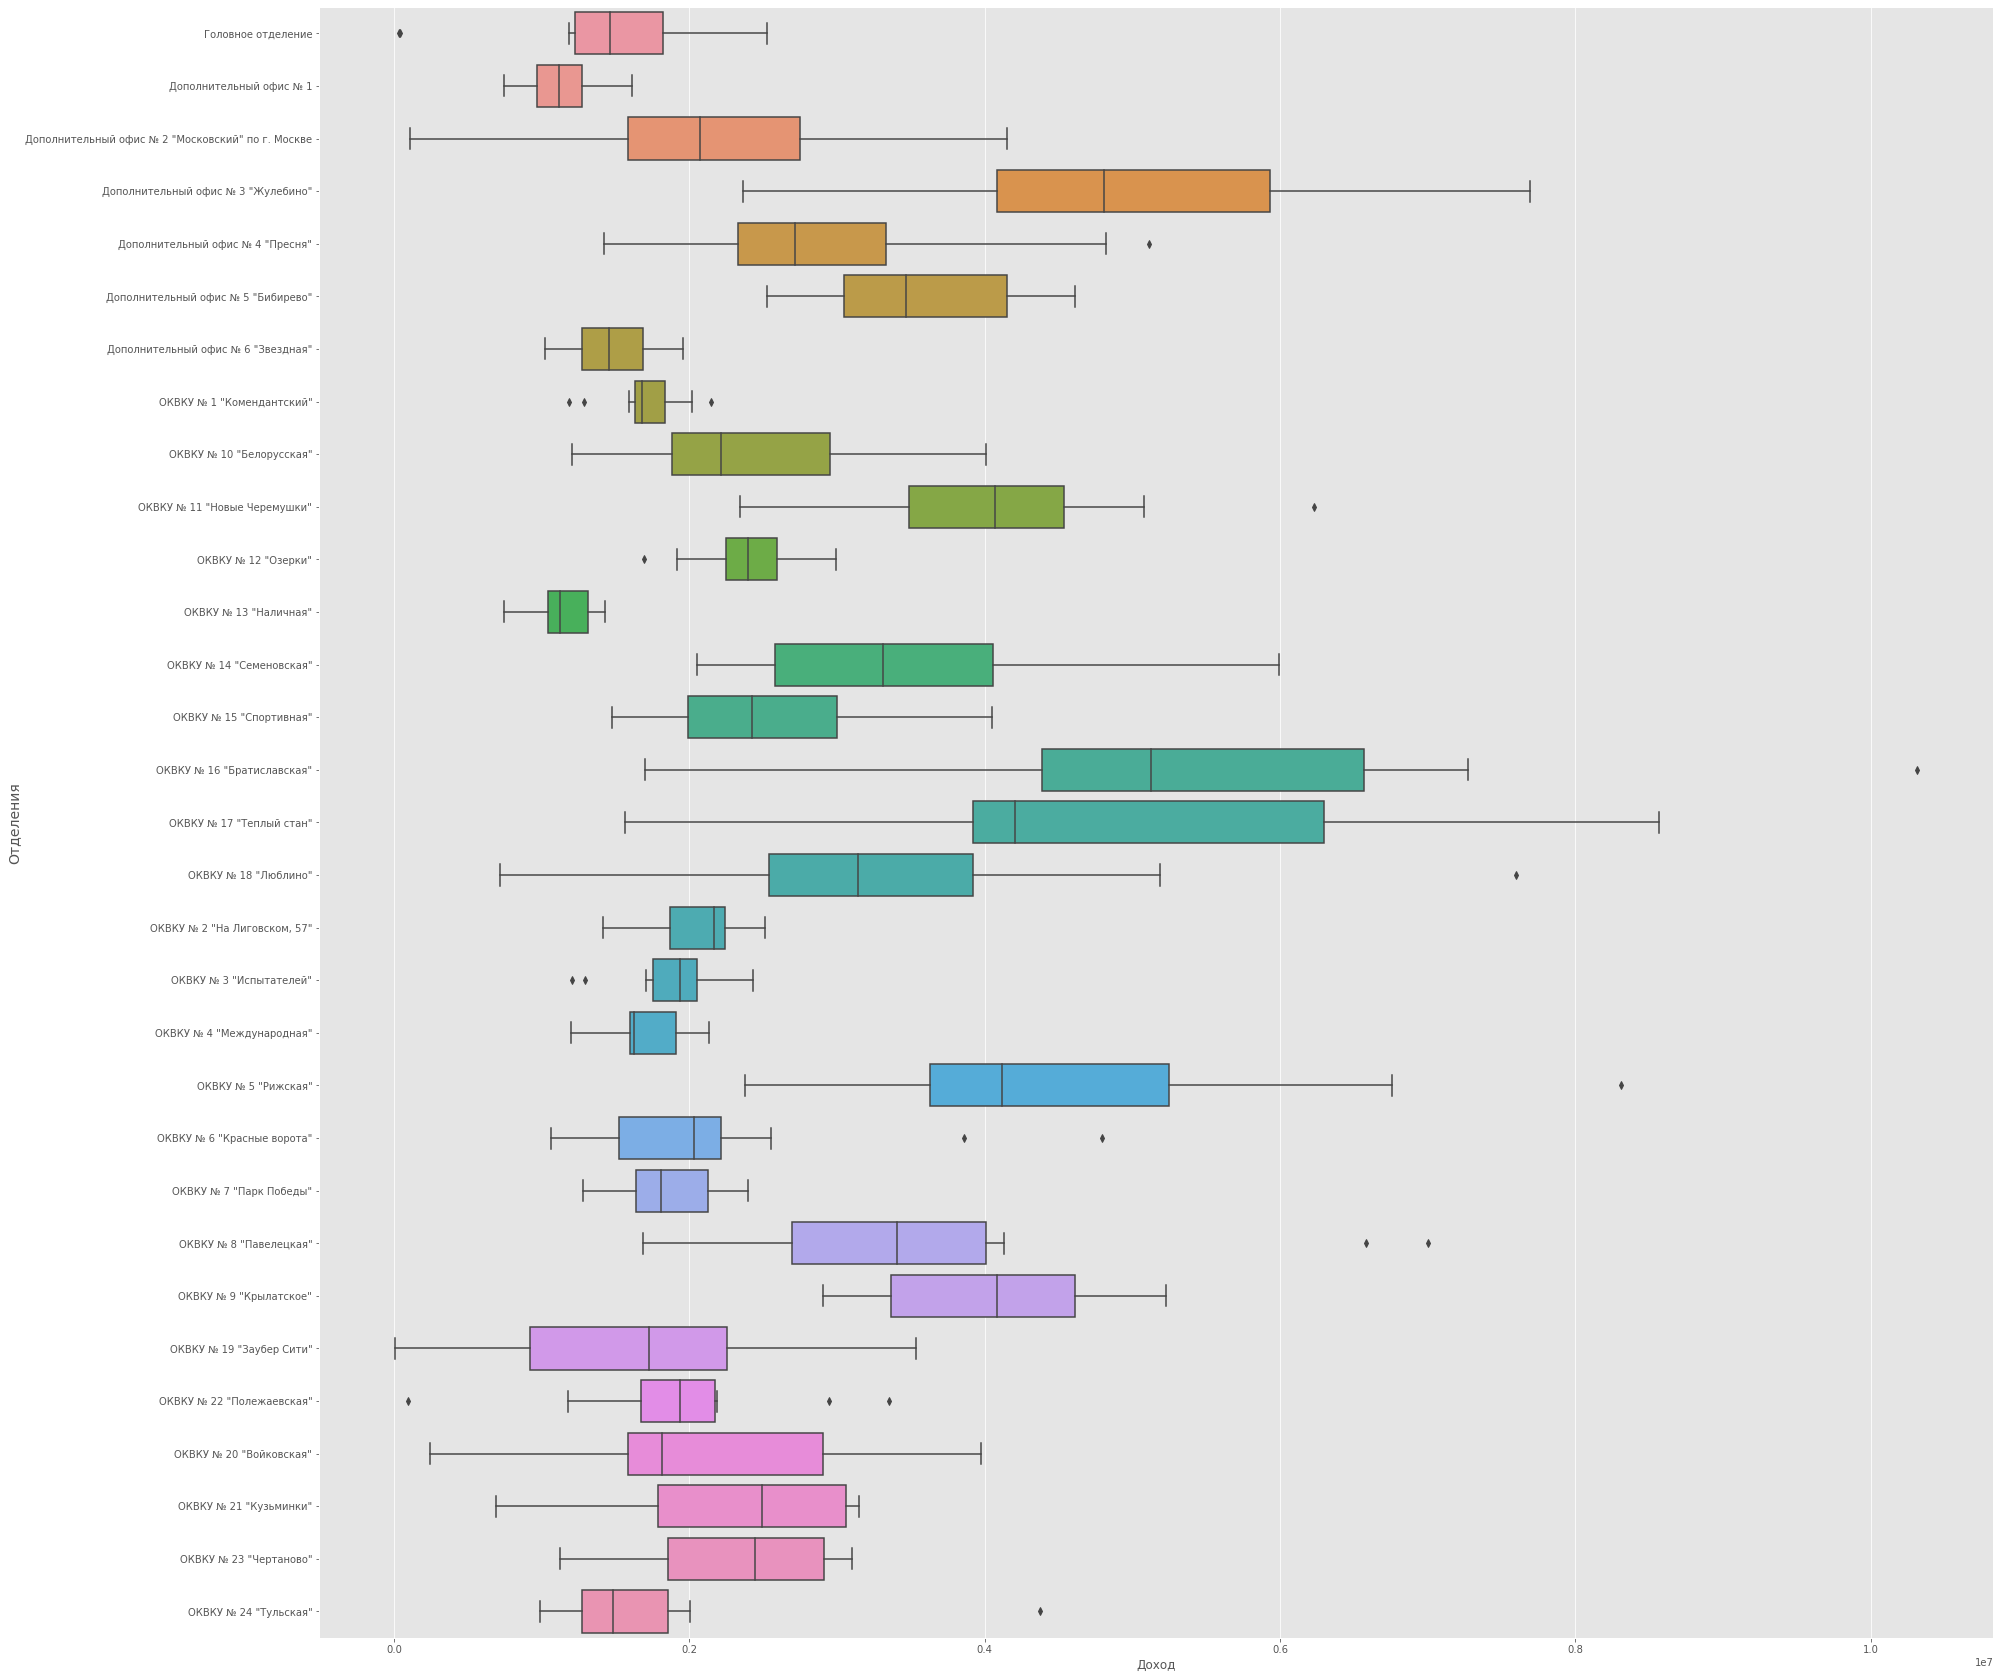

In [104]:
boxplot = sns.boxplot(y=df.department, x=df['Доход'], orient='h')
boxplot.set_ylabel("Отделения", fontsize=14)
#plt.xticks(rotation=90)


In [106]:
df_group = df.groupby(['department', 'Год_месяц']).agg({'Оборот': sum, 'cnt':sum})

In [108]:
df_group['Средний чек'] = df_group['Оборот'] / df_group['cnt']

In [110]:
df_group.drop(['Оборот', 'cnt'], axis=1, inplace=True)

In [113]:
df_group = df_group.unstack(level=1)

In [117]:
df_group = df_group.reindex(sorted(df_group.columns, key=lambda x: (x[1].split('_')[0], int(x[1].split('_')[1]))), axis=1)

In [119]:
df_group.to_excel('Средний_чек.xlsx')

In [121]:
df_2 = df[df['Год_месяц'].isin(['2021_3', '2021_4'])].groupby(['department', 'Год_месяц']).agg({'cnt':sum})

In [123]:
df_2 = df_2.unstack(level=1)

In [125]:
df_2 = df_2.reindex(sorted(df_2.columns, key=lambda x: (x[1].split('_')[0], int(x[1].split('_')[1]))), axis=1)

In [127]:
df_2.to_excel('Кол_во_операций.xlsx')

In [4]:
# получить дату предыдущей операции

try:
    with connect(
        host="localhost",
        user="root",
        password="Gtxtymr@21",
        database='daily_operations'
    ) as connection:
        query = """SELECT voo_clients.client_age, voo_operations.department, YEAR(voo_operations.operation_date), MONTH(voo_operations.operation_date), COUNT(voo_operations.operation_id), SUM(voo_operations.operation_revenue) FROM voo_clients
JOIN
(SELECT client_id,  MAX(client_date) client_date FROM voo_clients
GROUP BY 1) tbl1
ON tbl1.client_id = voo_clients.client_id AND tbl1.client_date = voo_clients.client_date
JOIN voo_operations
ON voo_operations.client_id = voo_clients.client_id
WHERE voo_operations.operation_date BETWEEN "2020-04-01" AND "2021-04-30" AND voo_operations.client_id IS NOT NULL AND voo_clients.client_age IS NOT NULL
GROUP BY 1, 2, 3, 4;"""
        DF = pd.read_sql(query, connection)
except Error as e:
    print(e)

In [5]:
DF['Год_месяц'] = DF['YEAR(voo_operations.operation_date)'].astype(str) + '_' + DF['MONTH(voo_operations.operation_date)'].astype(str)

In [6]:
DF.drop(['YEAR(voo_operations.operation_date)', 'MONTH(voo_operations.operation_date)'], axis=1, inplace=True)

In [7]:
DF = DF[DF.client_age.isin(range(18, 101))]

In [8]:
DF['Возрастная_группа'] = pd.cut(DF.client_age, right=False, bins=[18, 25, 35, 45, 55, 65, 75, 85, 95, np.inf])

In [27]:
DF = DF.merge(handbook)


In [28]:
DF

client_age                 department  \
0              69  ОКВКУ № 1 "Комендантский"   
1              50  ОКВКУ № 1 "Комендантский"   
2              34  ОКВКУ № 1 "Комендантский"   
3              59  ОКВКУ № 1 "Комендантский"   
4              48  ОКВКУ № 1 "Комендантский"   
...           ...                        ...   
22515          66      ОКВКУ № 24 "Тульская"   
22516          72      ОКВКУ № 24 "Тульская"   
22517          18      ОКВКУ № 24 "Тульская"   
22518          69      ОКВКУ № 24 "Тульская"   
22519          64      ОКВКУ № 24 "Тульская"   

       COUNT(voo_operations.operation_id)  \
0                                      15   
1                                      30   
2                                      46   
3                                      17   
4                                      31   
...                                   ...   
22515                                   1   
22516                                   1   
22517                                   1   
22518                                   1   
22519                                   1   

       SUM(voo_operations.operation_revenue) Год_месяц Возрастная_группа  \
0                                   29783.48    2020_4      [65.0, 75.0)   
1                                   63044.97    2020_4      [45.0, 55.0)   
2                                   52620.27    2020_4      [25.0, 35.0)   
3                                   36292.85    2020_4      [55.0, 65.0)   
4                                   64403.06    2020_4      [45.0, 55.0)   
...                                      ...       ...               ...   
22515                                 506.24   2020_12      [65.0, 75.0)   
22516                                1260.00    2021_1      [65.0, 75.0)   
22517                               14486.66   2020_12      [18.0, 25.0)   
22518                                 625.83    2021_1      [65.0, 75.0)   
22519                                 546.43   2020_11      [55.0, 65.0)   

                   Отделение Рейтинг               department.1  
0      Комендантский-ОКВКУ 1  Плохой  ОКВКУ № 1 "Комендантский"  
1      Комендантский-ОКВКУ 1  Плохой  ОКВКУ № 1 "Комендантский"  
2      Комендантский-ОКВКУ 1  Плохой  ОКВКУ № 1 "Комендантский"  
3      Комендантский-ОКВКУ 1  Плохой  ОКВКУ № 1 "Комендантский"  
4      Комендантский-ОКВКУ 1  Плохой  ОКВКУ № 1 "Комендантский"  
...                      ...     ...                        ...  
22515    Тульская - ОКВКУ 24  Плохой      ОКВКУ № 24 "Тульская"  
22516    Тульская - ОКВКУ 24  Плохой      ОКВКУ № 24 "Тульская"  
22517    Тульская - ОКВКУ 24  Плохой      ОКВКУ № 24 "Тульская"  
22518    Тульская - ОКВКУ 24  Плохой      ОКВКУ № 24 "Тульская"  
22519    Тульская - ОКВКУ 24  Плохой      ОКВКУ № 24 "Тульская"  

[22520 rows x 9 columns]

In [29]:
d = DF.groupby(['Рейтинг', 'Возрастная_группа']).agg({'SUM(voo_operations.operation_revenue)':sum})
d = d.rename(columns={'SUM(voo_operations.operation_revenue)': 'Доход'})




In [32]:
d

Доход
Рейтинг Возрастная_группа              
Плохой  [18.0, 25.0)       3.541669e+07
        [25.0, 35.0)       1.063936e+08
        [35.0, 45.0)       1.321915e+08
        [45.0, 55.0)       1.025884e+08
        [55.0, 65.0)       5.335702e+07
        [65.0, 75.0)       1.599376e+07
        [75.0, 85.0)       2.414265e+06
        [85.0, 95.0)       1.485006e+05
        [95.0, inf)        2.844306e+04
Хороший [18.0, 25.0)       5.672711e+07
        [25.0, 35.0)       1.360182e+08
        [35.0, 45.0)       1.547962e+08
        [45.0, 55.0)       1.146556e+08
        [55.0, 65.0)       5.639049e+07
        [65.0, 75.0)       1.507513e+07
        [75.0, 85.0)       1.918582e+06
        [85.0, 95.0)       1.722340e+05
        [95.0, inf)        2.818300e+02

In [31]:
d.plot(kind='bar')

<AxesSubplot:xlabel='Рейтинг,Возрастная_группа'>

In [33]:

s = sns.barplot(d)
plt.xticks(rotation=45)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [184]:
DF_3 = DF[DF['Год_месяц'] == '2021_3']
#DF_3.drop('Возрастная_группа', axis=1, inplace=True)
DF_3 = DF_3.rename(columns={'COUNT(voo_operations.operation_id)': 'Кол-во_операций', 'SUM(voo_operations.operation_revenue)': 'Доход'})

DF_4 = DF[DF['Год_месяц'] == '2021_4']
#DF_4.drop('Возрастная_группа', axis=1, inplace=True)
DF_4 = DF_4.rename(columns={'COUNT(voo_operations.operation_id)': 'Кол-во_операций', 'SUM(voo_operations.operation_revenue)': 'Доход'})

In [185]:
DF_4 = DF_4.merge(df[['department', 'Рейтинг']])

DF_4_bad = DF_4[DF_4['Рейтинг'] == 'Плохой']
DF_4_good = DF_4[DF_4['Рейтинг'] == 'Хороший']

In [199]:
DF_4_bad = DF_4[DF_4['Рейтинг'] == 'Плохой']
DF_4_good = DF_4[DF_4['Рейтинг'] == 'Хороший']

client_age           False
department           False
Кол-во_операций      False
Доход                False
Год_месяц            False
Возрастная_группа    False
Рейтинг              False
dtype: bool

In [201]:
DF_5_bad = DF_4_bad.groupby(['Возрастная_группа'], as_index=False).agg({'Кол-во_операций': sum, 'Доход':sum})
DF_5_good = DF_4_good.groupby(['Возрастная_группа'], as_index=False).agg({'Кол-во_операций': sum, 'Доход':sum})

In [202]:
DF_5_bad

Возрастная_группа  Кол-во_операций         Доход
0      [18.0, 25.0)            11901  1.915302e+07
1      [25.0, 35.0)            56965  7.926470e+07
2      [35.0, 45.0)            79957  1.127717e+08
3      [45.0, 55.0)            71155  8.782627e+07
4      [55.0, 65.0)            41537  5.032877e+07
5      [65.0, 75.0)            12872  1.452825e+07
6      [75.0, 85.0)             1628  1.591830e+06
7      [85.0, 95.0)              145  1.753350e+05
8       [95.0, inf)                0  0.000000e+00

Text(0.5, 1.0, 'Кол-во операций и доход по возрастным группам (отделения с показателем апрельского дохода ниже среднего)')

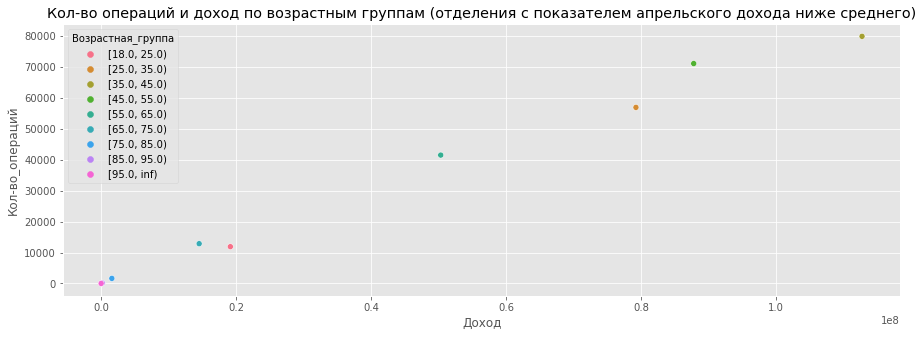

In [220]:
s = sns.scatterplot(
    data=DF_5_bad, 
    x="Доход", 
    y="Кол-во_операций", 
    hue="Возрастная_группа", sizes=10)
s.set_title('Кол-во операций и доход по возрастным группам (отделения с показателем апрельского дохода ниже среднего)')

Text(0.5, 1.0, 'Кол-во операций и доход по возрастным группам (отделения с показателем апрельского дохода выше или равно среднему)')

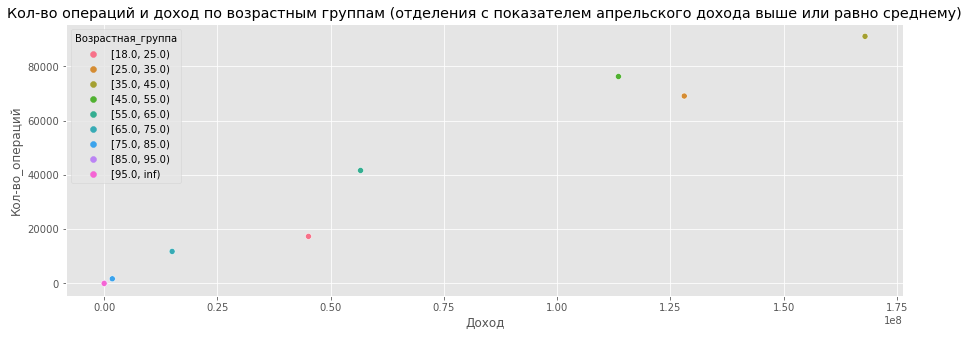

In [221]:
s = sns.scatterplot(
    data=DF_5_good, 
    x="Доход", 
    y="Кол-во_операций", 
    hue="Возрастная_группа", sizes=10)
s.set_title('Кол-во операций и доход по возрастным группам (отделения с показателем апрельского дохода выше или равно среднему)')

In [156]:
DF_4

client_age                  department  Кол-во_операций     Доход  \
0               20  ОКВКУ № 16 "Братиславская"               20  92360,51   
1               20  ОКВКУ № 16 "Братиславская"               20  92360,51   
2               20  ОКВКУ № 16 "Братиславская"               20  92360,51   
3               20  ОКВКУ № 16 "Братиславская"               20  92360,51   
4               20  ОКВКУ № 16 "Братиславская"               20  92360,51   
...            ...                         ...              ...       ...   
286222          18     Дополнительный офис № 1                1    216,09   
286223          18     Дополнительный офис № 1                1    216,09   
286224          18     Дополнительный офис № 1                1    216,09   
286225          18     Дополнительный офис № 1                1    216,09   
286226          18     Дополнительный офис № 1                1    216,09   

       Год_месяц Возрастная_группа  Рейтинг  
0         2021_4      [18.0, 25.0)  Хороший  
1         2021_4      [18.0, 25.0)  Хороший  
2         2021_4      [18.0, 25.0)  Хороший  
3         2021_4      [18.0, 25.0)  Хороший  
4         2021_4      [18.0, 25.0)  Хороший  
...          ...               ...      ...  
286222    2021_4      [18.0, 25.0)   Плохой  
286223    2021_4      [18.0, 25.0)   Плохой  
286224    2021_4      [18.0, 25.0)   Плохой  
286225    2021_4      [18.0, 25.0)   Плохой  
286226    2021_4      [18.0, 25.0)   Плохой  

[286227 rows x 7 columns]